# 4.2 - Regressão
###### NOTA: Considere apenas os países SouthernEurope:

### 1. Crie um diagrama de correlação entre a variável Premature_Deaths e os restantes atributos e interprete.

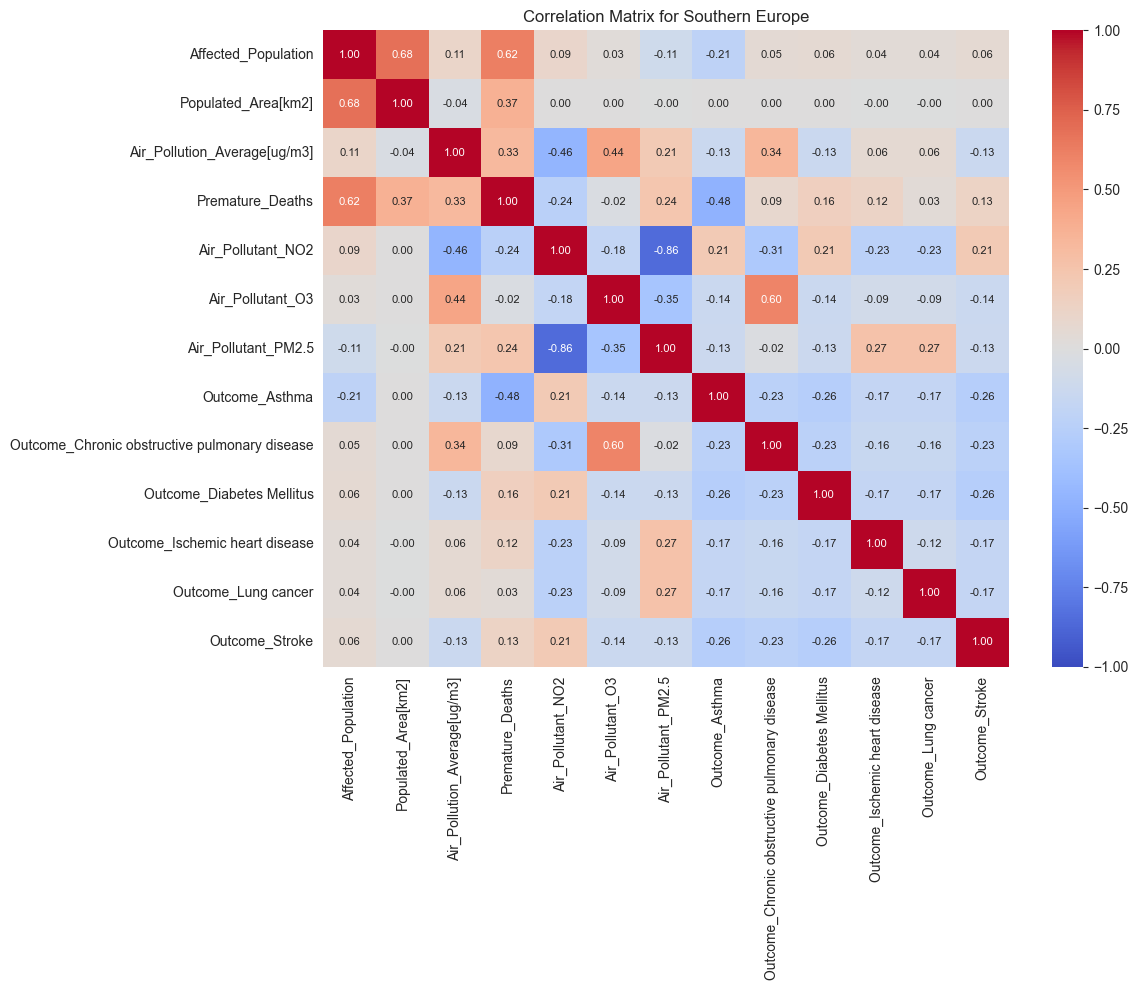


Correlações com Premature_Deaths:
---------------------------------------------------------
Premature_Deaths                                 1.000000
Affected_Population                              0.623744
Populated_Area[km2]                              0.371658
Air_Pollution_Average[ug/m3]                     0.326675
Air_Pollutant_PM2.5                              0.236729
Outcome_Diabetes Mellitus                        0.160434
Outcome_Stroke                                   0.125222
Outcome_Ischemic heart disease                   0.119221
Outcome_Chronic obstructive pulmonary disease    0.085828
Outcome_Lung cancer                              0.032064
Air_Pollutant_O3                                -0.023983
Air_Pollutant_NO2                               -0.235148
Outcome_Asthma                                  -0.479428
Name: Premature_Deaths, dtype: float64


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa.")

# Selecionar colunas relevantes e remover valores ausentes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols].dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes.")

# One-hot encode categorical variables
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar features para correlação
features = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]
corr = df_south[features].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix for Southern Europe')
plt.tight_layout()
plt.show()

# Print correlations with Premature_Deaths
print("\nCorrelações com Premature_Deaths:")
print("---------------------------------------------------------")
print(corr['Premature_Deaths'].sort_values(ascending=False))

###### Interpretação:
 * ToDo...

### 2. Usando o método k-fold cross validation obtenha um modelo regressão linear simples para a variável Premature_Deaths usando a variável Affected_Population

##### a) Apresente a função linear resultante
##### b) Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.
##### c) Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo

4.2.2 a) Função Linear: Premature_Deaths = 0.224 * Affected_Population + -0.000
4.2.2 b) Ver gráfico abaixo
4.2.2 c) Mean MAE: 0.005, Std MAE: 0.000
4.2.2 c) Mean RMSE: 0.022, Std RMSE: 0.004


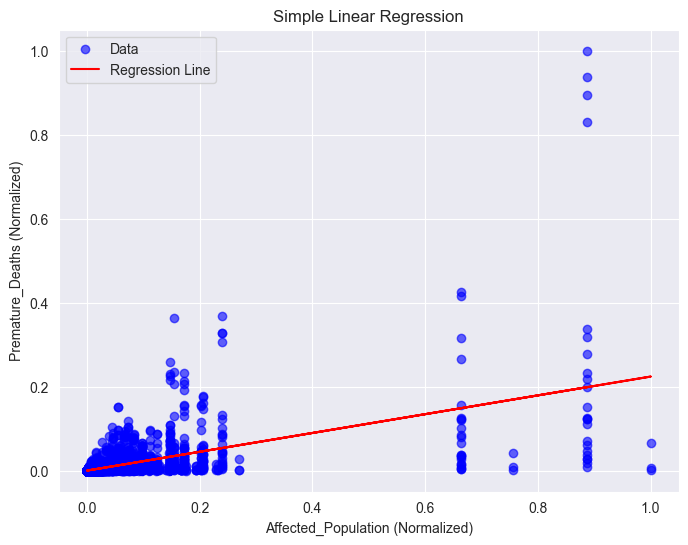

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa.")

# Selecionar colunas relevantes e remover valores ausentes
relevant_cols = ['Affected_Population', 'Premature_Deaths']
df_south = df_south[relevant_cols].dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes.")

# Selecionar features
X = df_south[['Affected_Population']].values
y = df_south['Premature_Deaths'].values

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# K-fold cross-validation
k = min(5, len(X_scaled)//2)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
coefs, intercepts = [], []
mae_scores, rmse_scores = [], []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), y_train)
    y_pred = model.predict(X_test.reshape(-1, 1))
    coefs.append(model.coef_[0])
    intercepts.append(model.intercept_)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Average model
mean_coef = np.mean(coefs)
mean_intercept = np.mean(intercepts)
print(f"4.2.2 a) Função Linear: Premature_Deaths = {mean_coef:.3f} * Affected_Population + {mean_intercept:.3f}")
print("4.2.2 b) Ver gráfico abaixo")
print(f"4.2.2 c) Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"4.2.2 c) Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualização
model = LinearRegression().fit(X_scaled.reshape(-1, 1), y_scaled)
y_pred = model.predict(X_scaled.reshape(-1, 1))
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled, y_scaled, color='blue', alpha=0.6, label='Data')
plt.plot(X_scaled, y_pred, color='red', label='Regression Line')
plt.xlabel('Affected_Population (Normalized)')
plt.ylabel('Premature_Deaths (Normalized)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

###### Interpretação:
* ToDO...

### 3. Usando o método k-fold cross validation desenvolva modelos para prever Premature_Deaths usando:

##### a) Regressão linear múltipla.


4.2.3 a) Função da Regressão Linear Múltipla:
Premature_Deaths = -0.016 + (0.166) * Affected_Population + (0.065) * Populated_Area[km2] + (0.048) * Air_Pollution_Average[ug/m3] + (0.010) * Air_Pollutant_NO2 + (-0.024) * Air_Pollutant_O3 + (0.014) * Air_Pollutant_PM2.5 + (-0.003) * Outcome_Asthma + (-0.002) * Outcome_Chronic obstructive pulmonary disease + (0.002) * Outcome_Diabetes Mellitus + (0.002) * Outcome_Ischemic heart disease + (0.000) * Outcome_Lung cancer + (0.001) * Outcome_Stroke

Métricas de Desempenho:
Mean MAE: 0.006, Std MAE: 0.000
Mean RMSE: 0.022, Std RMSE: 0.004


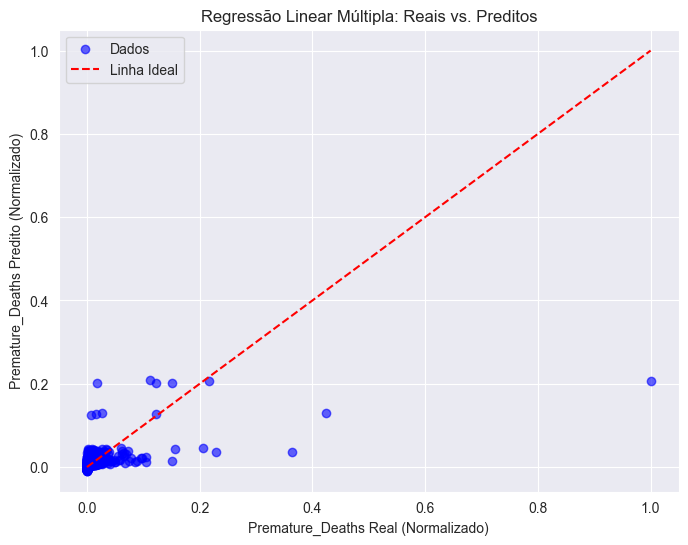

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes nas colunas relevantes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding para variáveis categóricas
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis independentes (X) e dependente (y)
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
coefs, intercepts = [], []
mae_scores, rmse_scores = [], []

# Treinar o modelo com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    coefs.append(model.coef_)
    intercepts.append(model.intercept_)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Calcular coeficientes médios e intercepto médio
mean_coefs = np.mean(coefs, axis=0)
mean_intercept = np.mean(intercepts)

# Função do modelo
print("\n4.2.3 a) Função da Regressão Linear Múltipla:")
equation = f"Premature_Deaths = {mean_intercept:.3f}"
for coef, feature in zip(mean_coefs, X.columns):
    equation += f" + ({coef:.3f}) * {feature}"
print(equation)

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualização: Valores reais vs. preditos (último fold)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Dados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha Ideal')
plt.xlabel('Premature_Deaths Real (Normalizado)')
plt.ylabel('Premature_Deaths Predito (Normalizado)')
plt.title('Regressão Linear Múltipla: Reais vs. Preditos')
plt.legend()
plt.show()

###### Interpretação:
* ToDo...

##### b) Árvore de regressão. Otimize os parâmetros do modelo. Apresente a árvore de regressão obtida.

Melhores parâmetros: {'max_depth': 7, 'min_samples_split': 10}

Métricas de Desempenho:
Mean MAE: 0.005, Std MAE: 0.000
Mean RMSE: 0.024, Std RMSE: 0.004


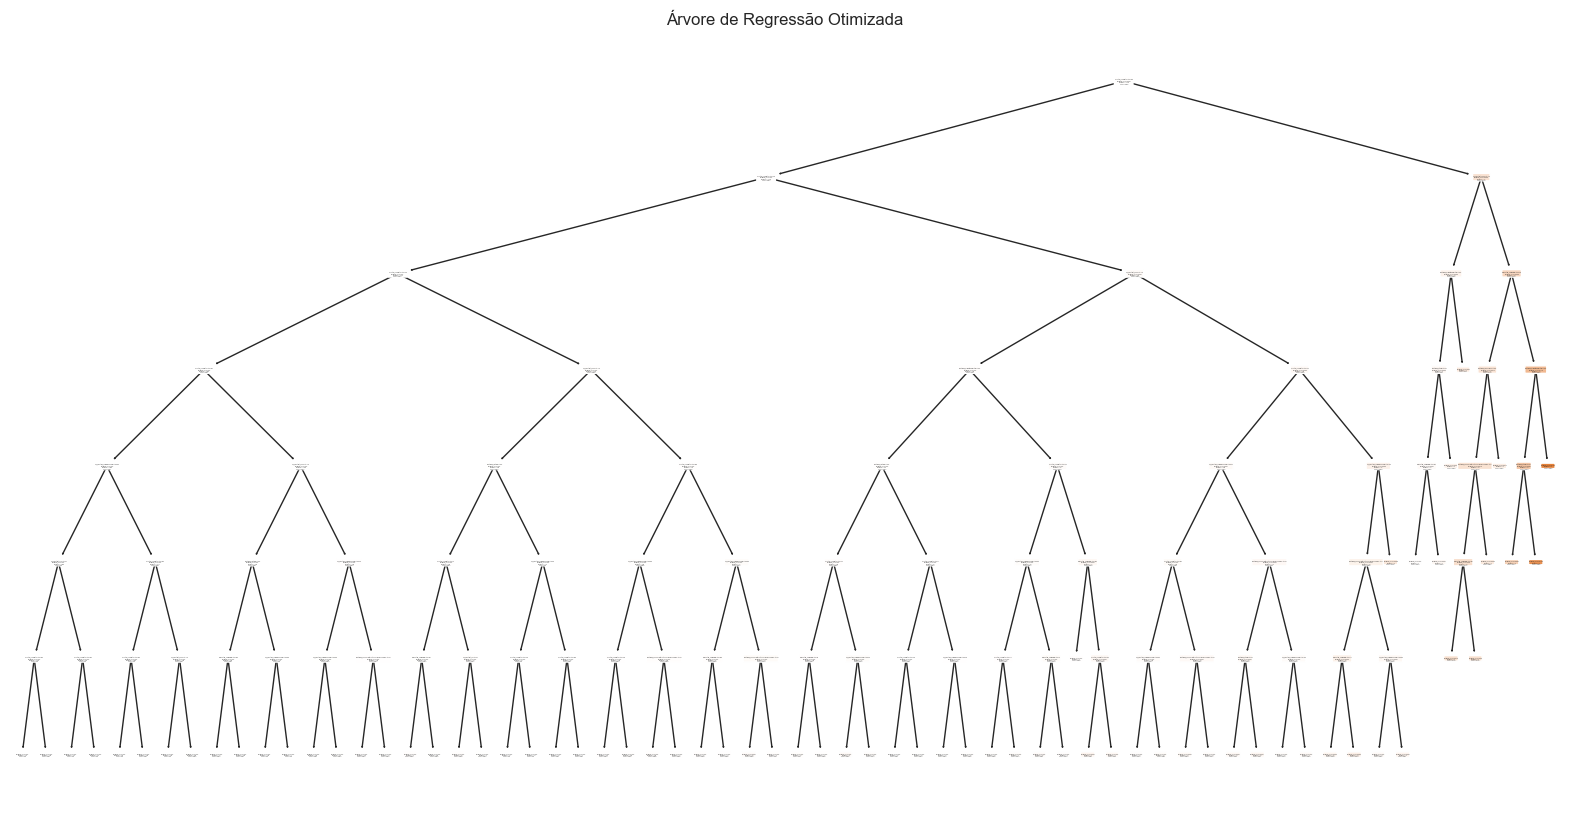

In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes nas colunas relevantes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mae_scores, rmse_scores = [], []

# Otimização de hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_dt = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_dt.fit(X_train, y_train)
    y_pred = best_dt.predict(X_test)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualizar a árvore
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árvore de Regressão Otimizada')
plt.show()

###### Interpretação:
* ToDo...

#####  c) SVM. Otimize o kernel.

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
            [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
svr_mae_scores = []  # Renomeado para evitar confusão
svr_rmse_scores = []

# Otimização de hiperparâmetros
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_svr = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    svr_mae_scores.append(mean_absolute_error(y_test, y_pred))
    svr_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir fold-wise MAE scores
print("\nSVR Fold-Wise MAE Scores:", [round(score, 6) for score in svr_mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(svr_mae_scores):.3f}, Std MAE: {np.std(svr_mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(svr_rmse_scores):.3f}, Std RMSE: {np.std(svr_rmse_scores):.3f}")

Melhores parâmetros: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}

SVR Fold-Wise MAE Scores: [0.00743, 0.00748, 0.007153, 0.006896, 0.007289]

Métricas de Desempenho:
Mean MAE: 0.007, Std MAE: 0.000
Mean RMSE: 0.024, Std RMSE: 0.005


###### Interpretação:
* ToDo...

##### d) Rede neuronal. Otimize a configuração da rede.

In [26]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
            [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mlp_mae_scores = []  # Renomeado para evitar confusão
mlp_rmse_scores = []

# Otimização de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_mlp = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_mlp.fit(X_train, y_train)
    y_pred = best_mlp.predict(X_test)
    mlp_mae_scores.append(mean_absolute_error(y_test, y_pred))
    mlp_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir fold-wise MAE scores
print("\nMLPRegressor Fold-Wise MAE Scores:", [round(score, 6) for score in mlp_mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mlp_mae_scores):.3f}, Std MAE: {np.std(mlp_mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(mlp_rmse_scores):.3f}, Std RMSE: {np.std(mlp_rmse_scores):.3f}")

Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1000}

MLPRegressor Fold-Wise MAE Scores: [0.006071, 0.005721, 0.006634, 0.005674, 0.005796]

Métricas de Desempenho:
Mean MAE: 0.006, Std MAE: 0.000
Mean RMSE: 0.023, Std RMSE: 0.004


###### Interpretação:
* ToDo...

### 4. Compare os resultados obtidos pelos modelos referidos na questão 5, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

In [27]:
import pandas as pd

# Metrics from SVR (EX 4.2.3c)
svr_metrics = {
    'Model': 'SVR',
    'Mean MAE': 0.007,
    'Std MAE': 0.000,
    'Mean RMSE': 0.024,
    'Std RMSE': 0.005
}

# Metrics from MLPRegressor (EX 4.2.3d)
mlp_metrics = {
    'Model': 'MLPRegressor',
    'Mean MAE': 0.006,
    'Std MAE': 0.000,
    'Mean RMSE': 0.023,
    'Std RMSE': 0.004
}

# Compile metrics into a DataFrame
metrics_df = pd.DataFrame([svr_metrics, mlp_metrics])

# Display the comparison table
print("Comparison of Model Performance (MAE and RMSE)")
print(metrics_df.to_string(index=False))

Comparison of Model Performance (MAE and RMSE)
       Model  Mean MAE  Std MAE  Mean RMSE  Std RMSE
         SVR     0.007      0.0      0.024     0.005
MLPRegressor     0.006      0.0      0.023     0.004


###### Interpretação:
* ToDo...

### 5. Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%) e identifique o(s) modelo(s) com melhor desempenho.

In [11]:
import numpy as np
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Fold-wise MAE scores from sections 4.2.3c and 4.2.3d
svr_mae_scores = [0.00743, 0.00748, 0.007153, 0.006896, 0.007289]
mlp_mae_scores = [0.006071, 0.005721, 0.006634, 0.005674, 0.005796]

# Calcular diferenças entre os scores
differences = np.array(svr_mae_scores) - np.array(mlp_mae_scores)

# Teste de Shapiro-Wilk para normalidade
shapiro_stat, shapiro_p = shapiro(differences)
print(f"Shapiro-Wilk Test: estatística = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")

# Definir nível de significância
alpha = 0.05

# Escolher teste com base na normalidade
if shapiro_p > 0.05:
    # Dados normais: usar teste t
    test_name = "teste t"
    t_stat, p_value = ttest_rel(svr_mae_scores, mlp_mae_scores)
    print(f"Teste t: t-statistic = {t_stat:.3f}, p-valor = {p_value:.3f}")
    test_statistic = t_stat
else:
    # Dados não normais: usar teste de Wilcoxon
    test_name = "teste de Wilcoxon signed-rank"
    result = wilcoxon(svr_mae_scores, mlp_mae_scores, method='auto')
    statistic = result.statistic
    p_value = result.pvalue
    print(f"Teste de Wilcoxon: estatística = {statistic:.3f}, p-valor = {p_value:.3f}")
    test_statistic = statistic

# Interpretar significância
if p_value < alpha:
    significance = "estatisticamente significativa"
    best_model = "MLPRegressor" if np.mean(mlp_mae_scores) < np.mean(svr_mae_scores) else "SVR"
else:
    significance = "não estatisticamente significativa"
    best_model = "nenhum (desempenho similar)"

# Interpretação
print("\n=== Resultados ===")
print(f"Teste de normalidade (Shapiro-Wilk): p-valor = {shapiro_p:.3f}")
print(f"Teste aplicado: {test_name}")
print(f"Estatística do teste: {test_statistic:.3f}, p-valor = {p_value:.3f}")
print(f"Significância: A diferença é {significance}")
print(f"Melhor modelo: {best_model}")

Shapiro-Wilk Test: estatística = 0.917, p-valor = 0.510
Teste t pareado: t-statistic = 6.115, p-valor = 0.004

=== Resultados ===
Teste de normalidade (Shapiro-Wilk): p-valor = 0.510
Teste aplicado: teste t pareado
Estatística do teste: 6.115, p-valor = 0.004
Significância: A diferença é estatisticamente significativa
Melhor modelo: MLPRegressor


###### Interpretação:
* ToDo...